<a href="https://colab.research.google.com/github/namthuan2304/DM_2024/blob/main/Lab_3_21130556_%C4%90%E1%BA%B7ngNamThu%E1%BA%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 3: Association Rules - Apriori using **efficient-apriori** api
# 21130556 - Đặng Nam Thuận


---



# Import libraries

In [1]:
!pip install efficient-apriori

In [40]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from efficient_apriori import apriori
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/DM_Labs'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/DM_Labs


#Task 1. Apply Apriori algorithm to **dataset1** with 5 transactions from a set of items {Bread, Milk, Diaper, Beer, Coke}

#Task 1.1. Prepare dataset (load transactions from dataset1.csv and preprocess them)

In [4]:
dataset1 = pd.read_csv('dataset1.csv')
dataset1['Items'] = dataset1['Items'].str.split(',')
for i in range(len(dataset1)):
    dataset1.at[i, 'Items'] = [x.strip() for x in dataset1['Items'][i]]
dataset1.head()

,TID,Items
0,1,"[Bread, Milk]"
1,2,"[Bread, Diaper, Beer, Eggs]"
2,3,"[Milk, Diaper, Beer, Coke]"
3,4,"[Bread, Milk, Diaper, Beer]"
4,5,"[Bread, Milk, Diaper, Coke]"


#Task 1.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50%

In [5]:
itemsets, rules = apriori(dataset1['Items'], min_support=0.5,  min_confidence=0.5)

In [6]:
print(itemsets)

{1: {('Bread',): 4, ('Milk',): 4, ('Diaper',): 4, ('Beer',): 3}, 2: {('Beer', 'Diaper'): 3, ('Bread', 'Diaper'): 3, ('Bread', 'Milk'): 3, ('Diaper', 'Milk'): 3}}


In [7]:
print(rules)

[{Diaper} -> {Beer}, {Beer} -> {Diaper}, {Diaper} -> {Bread}, {Bread} -> {Diaper}, {Milk} -> {Bread}, {Bread} -> {Milk}, {Milk} -> {Diaper}, {Diaper} -> {Milk}]


#Task 1.3. Report association rules obtained from Task 1.2 (include their support, confidence, and lift)

In [8]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in rules_rhs:
    print(rule)

{Diaper} -> {Beer} (conf: 0.750, supp: 0.600, lift: 1.250, conv: 1.600)
{Beer} -> {Diaper} (conf: 1.000, supp: 0.600, lift: 1.250, conv: 200000000.000)
{Diaper} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Bread} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Bread} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Milk} -> {Diaper} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)
{Diaper} -> {Milk} (conf: 0.750, supp: 0.600, lift: 0.938, conv: 0.800)


#Task 2. Apply Apriori algorithm to **dataset2** with transactions from a set of 20 items

#Task 2.1. Prepare dataset (load transactions from dataset1.csv and preprocess them)

In [37]:
dataset2 = pd.read_csv('dataset2.csv', header=None)
items = []
for i in range(len(dataset2)):
    item = [x.strip() for x in dataset2.iloc[i, :] if pd.notna(x)]
    items.append(item)
pre_dataset2 = pd.DataFrame({'Items': items})
pre_dataset2.head()

,Items
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


#Task 2.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50% (*modify min_supp and min_conf if proposed values are not appropriate*)

In [35]:
itemsets, rules = apriori(pre_dataset2, min_support=0.5,  min_confidence=0.5)

In [26]:
print(itemsets)

{1: {('I',): 1, ('t',): 1, ('e',): 1, ('m',): 1, ('s',): 1}, 2: {('I', 'e'): 1, ('I', 'm'): 1, ('I', 's'): 1, ('I', 't'): 1, ('e', 'm'): 1, ('e', 's'): 1, ('e', 't'): 1, ('m', 's'): 1, ('m', 't'): 1, ('s', 't'): 1}, 3: {('I', 'e', 'm'): 1, ('I', 'e', 's'): 1, ('I', 'e', 't'): 1, ('I', 'm', 's'): 1, ('I', 'm', 't'): 1, ('I', 's', 't'): 1, ('e', 'm', 's'): 1, ('e', 'm', 't'): 1, ('e', 's', 't'): 1, ('m', 's', 't'): 1}, 4: {('I', 'e', 'm', 's'): 1, ('I', 'e', 'm', 't'): 1, ('I', 'e', 's', 't'): 1, ('I', 'm', 's', 't'): 1, ('e', 'm', 's', 't'): 1}, 5: {('I', 'e', 'm', 's', 't'): 1}}


In [27]:
print(rules)

[{e} -> {I}, {I} -> {e}, {m} -> {I}, {I} -> {m}, {s} -> {I}, {I} -> {s}, {t} -> {I}, {I} -> {t}, {m} -> {e}, {e} -> {m}, {s} -> {e}, {e} -> {s}, {t} -> {e}, {e} -> {t}, {s} -> {m}, {m} -> {s}, {t} -> {m}, {m} -> {t}, {t} -> {s}, {s} -> {t}, {e, m} -> {I}, {I, m} -> {e}, {I, e} -> {m}, {m} -> {I, e}, {e} -> {I, m}, {I} -> {e, m}, {e, s} -> {I}, {I, s} -> {e}, {I, e} -> {s}, {s} -> {I, e}, {e} -> {I, s}, {I} -> {e, s}, {e, t} -> {I}, {I, t} -> {e}, {I, e} -> {t}, {t} -> {I, e}, {e} -> {I, t}, {I} -> {e, t}, {m, s} -> {I}, {I, s} -> {m}, {I, m} -> {s}, {s} -> {I, m}, {m} -> {I, s}, {I} -> {m, s}, {m, t} -> {I}, {I, t} -> {m}, {I, m} -> {t}, {t} -> {I, m}, {m} -> {I, t}, {I} -> {m, t}, {s, t} -> {I}, {I, t} -> {s}, {I, s} -> {t}, {t} -> {I, s}, {s} -> {I, t}, {I} -> {s, t}, {m, s} -> {e}, {e, s} -> {m}, {e, m} -> {s}, {s} -> {e, m}, {m} -> {e, s}, {e} -> {m, s}, {m, t} -> {e}, {e, t} -> {m}, {e, m} -> {t}, {t} -> {e, m}, {m} -> {e, t}, {e} -> {m, t}, {s, t} -> {e}, {e, t} -> {s}, {e, s} ->

#Task 2.3. Report association rules obtained from Task 2.2 (include their **support**, **confidence**, and **lift**)

In [38]:
#rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules, key=lambda rule: rule.lift):
    print(rule)

{e} -> {I} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{I} -> {e} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{m} -> {I} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{I} -> {m} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{s} -> {I} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{I} -> {s} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{t} -> {I} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{I} -> {t} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{m} -> {e} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{e} -> {m} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{s} -> {e} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{e} -> {s} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{t} -> {e} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{e} -> {t} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{s} -> {m} (conf: 1.000, supp: 1.000, lift: 1.000, conv: 0.000)
{m} -> {s} (conf: 1.000, supp: 1.000, li

#Task 2.4. Apply Apriori with different values of support and plot the running time

In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in rules_rhs:
    print(rule)

#Task 3. Apply **Apriori** to dataset 3 using **mlxtend** API
The dataset contains 435 voting records on 16 different features ranged fromeducation to defense. The main objective of the task is to use association mining to find the combination of attributes has the highest confidence with either republican or democrat

In [50]:
!pip install mlxtend

In [53]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas import get_dummies, concat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Task 3.1. Preprocessing dataset, plot the missing rate for each attribute. Then, remove the high missing attributes (?: missing). Other missing values will be imputed by 'y'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


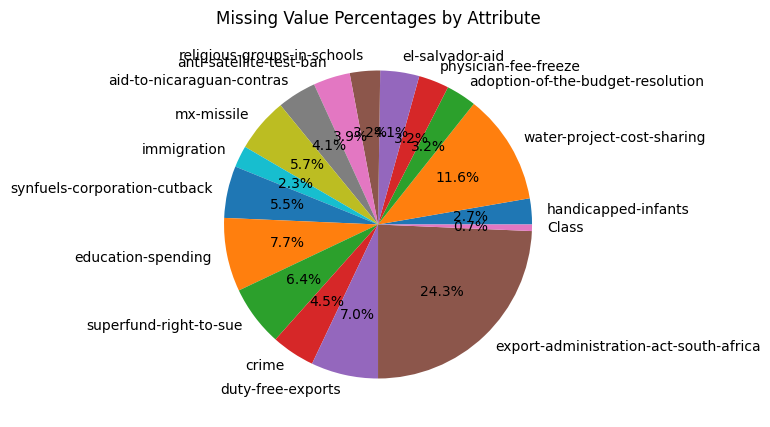

,id,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,1,n,y,n,y,y,y,n,n,n,y,y,y,y,y,n,y,republican
1,2,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,republican
2,3,y,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,4,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y,democrat
4,5,y,y,y,n,y,y,n,n,n,n,y,y,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,n,n,n,y,y,y,y,y,y,y,n,y,y,y,n,y,republican
434,435,n,y,n,y,y,y,n,n,n,y,n,y,y,y,y,n,republican
435,436,%,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y
436,437,%,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y


In [63]:
dataset3 = pd.read_csv('dataset3.csv')
dataset3.replace('?', pd.NA, inplace=True)
miss_val = dataset3.isna().sum()
miss_per = (miss_val / len(dataset3)) * 100
miss_per = miss_per[miss_per > 0]
plt.figure(figsize=(5, 5))
miss_per.plot(kind='pie', autopct='%1.1f%%')
plt.title('Missing Value Percentages by Attribute')
plt.ylabel('')
plt.show()
high_missing_cols = miss_per[miss_per > 50].index
dataset3_cleaned = dataset3.drop(columns=high_missing_cols)
dataset3_cleaned.fillna('y', inplace=True)
dataset3_cleaned

#Task 3.2. Convert **Class** attribute to 2 columns based on its values (republican, democrat).

In [64]:
dummies = pd.get_dummies(dataset3_cleaned['Class'], dtype=int)
dataset3_cleaned = pd.concat([dataset3_cleaned, dummies[['republican', 'democrat']]], axis=1)
dataset3_cleaned.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class,republican,democrat
0,1,n,y,n,y,y,y,n,n,n,y,y,y,y,y,n,y,republican,1,0
1,2,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,republican,1,0
2,3,y,y,y,y,y,y,n,n,n,n,y,n,y,y,n,n,democrat,0,1
3,4,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y,democrat,0,1
4,5,y,y,y,n,y,y,n,n,n,n,y,y,y,y,y,y,democrat,0,1


#Task 3.3. Drop unnecessary columns from the dataset(Class, id)

In [65]:
dataset3_cleaned = dataset3_cleaned.drop(columns='id')
dataset3_cleaned = dataset3_cleaned.drop(columns='Class')
dataset3_cleaned.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,republican,democrat
433,n,n,n,y,y,y,y,y,y,y,n,y,y,y,n,y,1,0
434,n,y,n,y,y,y,n,n,n,y,n,y,y,y,y,n,1,0
435,%,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,0,0
436,%,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,0,0
437,%,y,y,y,y,y,y,y,y,y,y,y,y,y,y,y,0,0


#Task 3.4. Apply Apriori to the preprocessed dataset using **mlxtend** using your min_supp and min_conf.

In [71]:
a = TransactionEncoder()
a_data = a.fit_transform(dataset3_cleaned)
df = pd.DataFrame(a_data, columns=a.columns_)

# Replace False with 0 and True with 1
df = df.replace(False, 0)
df = df.replace(True, 1)

# Apply Apriori algorithm with min_support and min_conf
re = apriori(df, min_support=0.5, use_colnames=True, verbose=1)

# Display the results of Apriori
print(re)

# If you also want to extract the association rules:
rules = association_rules(re, metric="confidence", min_threshold=0.7)
print(rules)


Empty DataFrame
Columns: [support, itemsets]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-f593b6369b00>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True, 1)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [66]:
re = apriori(dataset3_cleaned, min_support=0.5, use_colnames=True, verbose=1)
re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value n

#Task 3.5. Report the rules obtained from the Task 3.4.

In [ ]:
#code

#Task 3.6. Filter all rules X => Y with Y belonging to {**republican**, **democrat**}

In [ ]:
#code